In [1]:
import seaborn as sea
import numpy as np
import pandas as pd
import geopandas as gpd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
import warnings
warnings.filterwarnings("ignore")


In [16]:
df_COL = pd.read_csv('C:/repos/pyScripts/GCOL_dataset/cost-of-living.csv')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [3]:
df_COL.head()


,Unnamed: 0,city,country,x1,x2,x3,x4,x5,x6,x7,...,x47,x48,x49,x50,x51,x52,x53,x54,x55,data_quality
0,0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48,...,36.26,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35,7.96,1
1,1,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,...,121.19,1080.07,564.30,2972.57,1532.23,17333.09,9174.88,1382.83,5.01,1
2,2,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59,...,80.32,482.85,270.15,1117.69,584.37,2694.05,1269.44,483.19,9.15,1
3,3,Manila,Philippines,3.54,27.40,3.54,1.24,1.90,2.91,0.93,...,61.82,559.52,281.78,1754.40,684.81,3536.04,2596.44,419.02,7.80,1
4,4,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46,...,108.30,809.83,583.60,2621.05,1683.74,21847.94,10832.90,2672.23,3.47,1


In [4]:
#Select instances where data quality is good

data_good = df_COL[df_COL["data_quality"] == 1]
data_bad  = df_COL[df_COL["data_quality"] == 0]

data_good.shape # (923, 58)
data_bad.shape # (4033, 58)

#Delete column data quality as we will not need it any longer
data_bad.drop("data_quality", inplace = True, axis = 1) 
data_good.drop("data_quality", inplace = True, axis = 1) 

In [5]:
data_good.head()


,Unnamed: 0,city,country,x1,x2,x3,x4,x5,x6,x7,...,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55
0,0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48,...,49.35,36.26,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35,7.96
1,1,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,...,86.55,121.19,1080.07,564.30,2972.57,1532.23,17333.09,9174.88,1382.83,5.01
2,2,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59,...,72.89,80.32,482.85,270.15,1117.69,584.37,2694.05,1269.44,483.19,9.15
3,3,Manila,Philippines,3.54,27.40,3.54,1.24,1.90,2.91,0.93,...,69.47,61.82,559.52,281.78,1754.40,684.81,3536.04,2596.44,419.02,7.80
4,4,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46,...,70.21,108.30,809.83,583.60,2621.05,1683.74,21847.94,10832.90,2672.23,3.47


In [6]:
df_COL.shape


(4874, 59)

In [7]:
quality_data_percent = (data_good.shape[0])/(df_COL.shape[0])*100
print("{:.0f} percent of total cost of living data is good quality".format(quality_data_percent))

19 percent of total cost of living data is good quality


In [8]:
data_good.head()

,Unnamed: 0,city,country,x1,x2,x3,x4,x5,x6,x7,...,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55
0,0,Delhi,India,4.90,22.04,4.28,1.84,3.67,1.78,0.48,...,49.35,36.26,223.87,133.38,596.16,325.82,2619.46,1068.90,586.35,7.96
1,1,Shanghai,China,5.59,40.51,5.59,1.12,4.19,3.96,0.52,...,86.55,121.19,1080.07,564.30,2972.57,1532.23,17333.09,9174.88,1382.83,5.01
2,2,Jakarta,Indonesia,2.54,22.25,3.50,2.02,3.18,2.19,0.59,...,72.89,80.32,482.85,270.15,1117.69,584.37,2694.05,1269.44,483.19,9.15
3,3,Manila,Philippines,3.54,27.40,3.54,1.24,1.90,2.91,0.93,...,69.47,61.82,559.52,281.78,1754.40,684.81,3536.04,2596.44,419.02,7.80
4,4,Seoul,South Korea,7.16,52.77,6.03,3.02,4.52,3.86,1.46,...,70.21,108.30,809.83,583.60,2621.05,1683.74,21847.94,10832.90,2672.23,3.47


<AxesSubplot: >

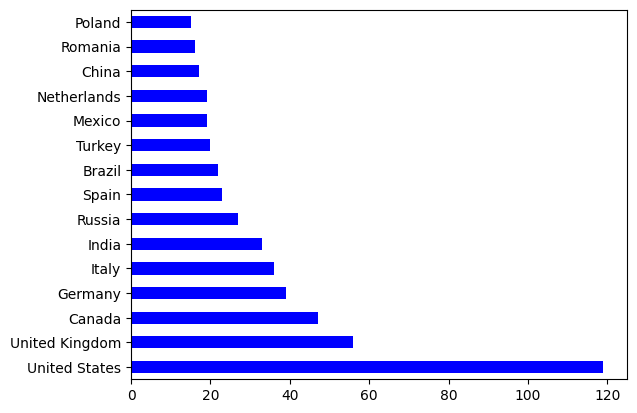

In [9]:
data_good["country"].value_counts()[:15].plot(kind= "barh", color = "blue")

<AxesSubplot: >

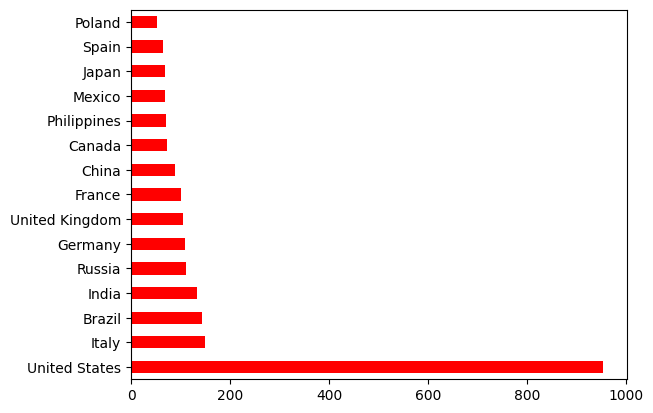

In [10]:
data_bad["country"].value_counts()[0:15].plot(kind= "barh", color = "red")

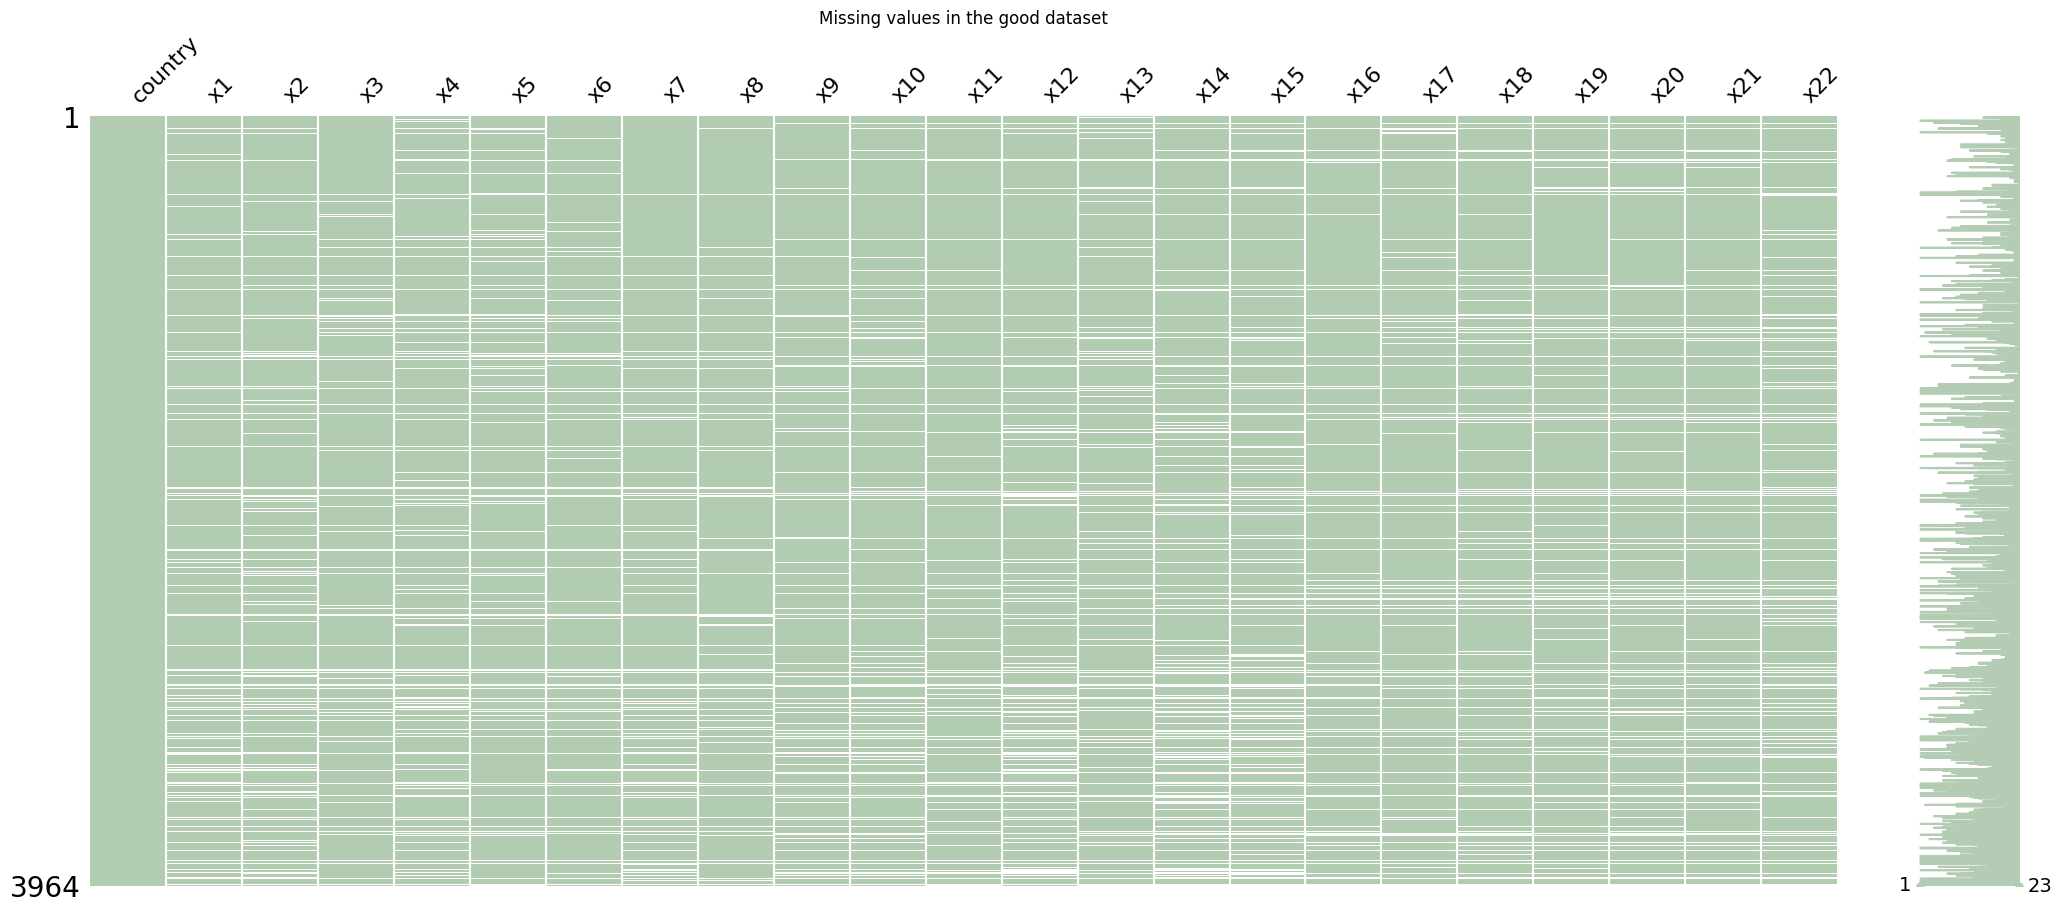

In [13]:
data_bad.isnull().sum().sort_values()

#Visualize missing values for first 23 variables in the good data
msno.matrix(data_bad.iloc[:,2:25],color = (0.7, 0.8, 0.7))
plt.title("Missing values in the good dataset")
plt.show()

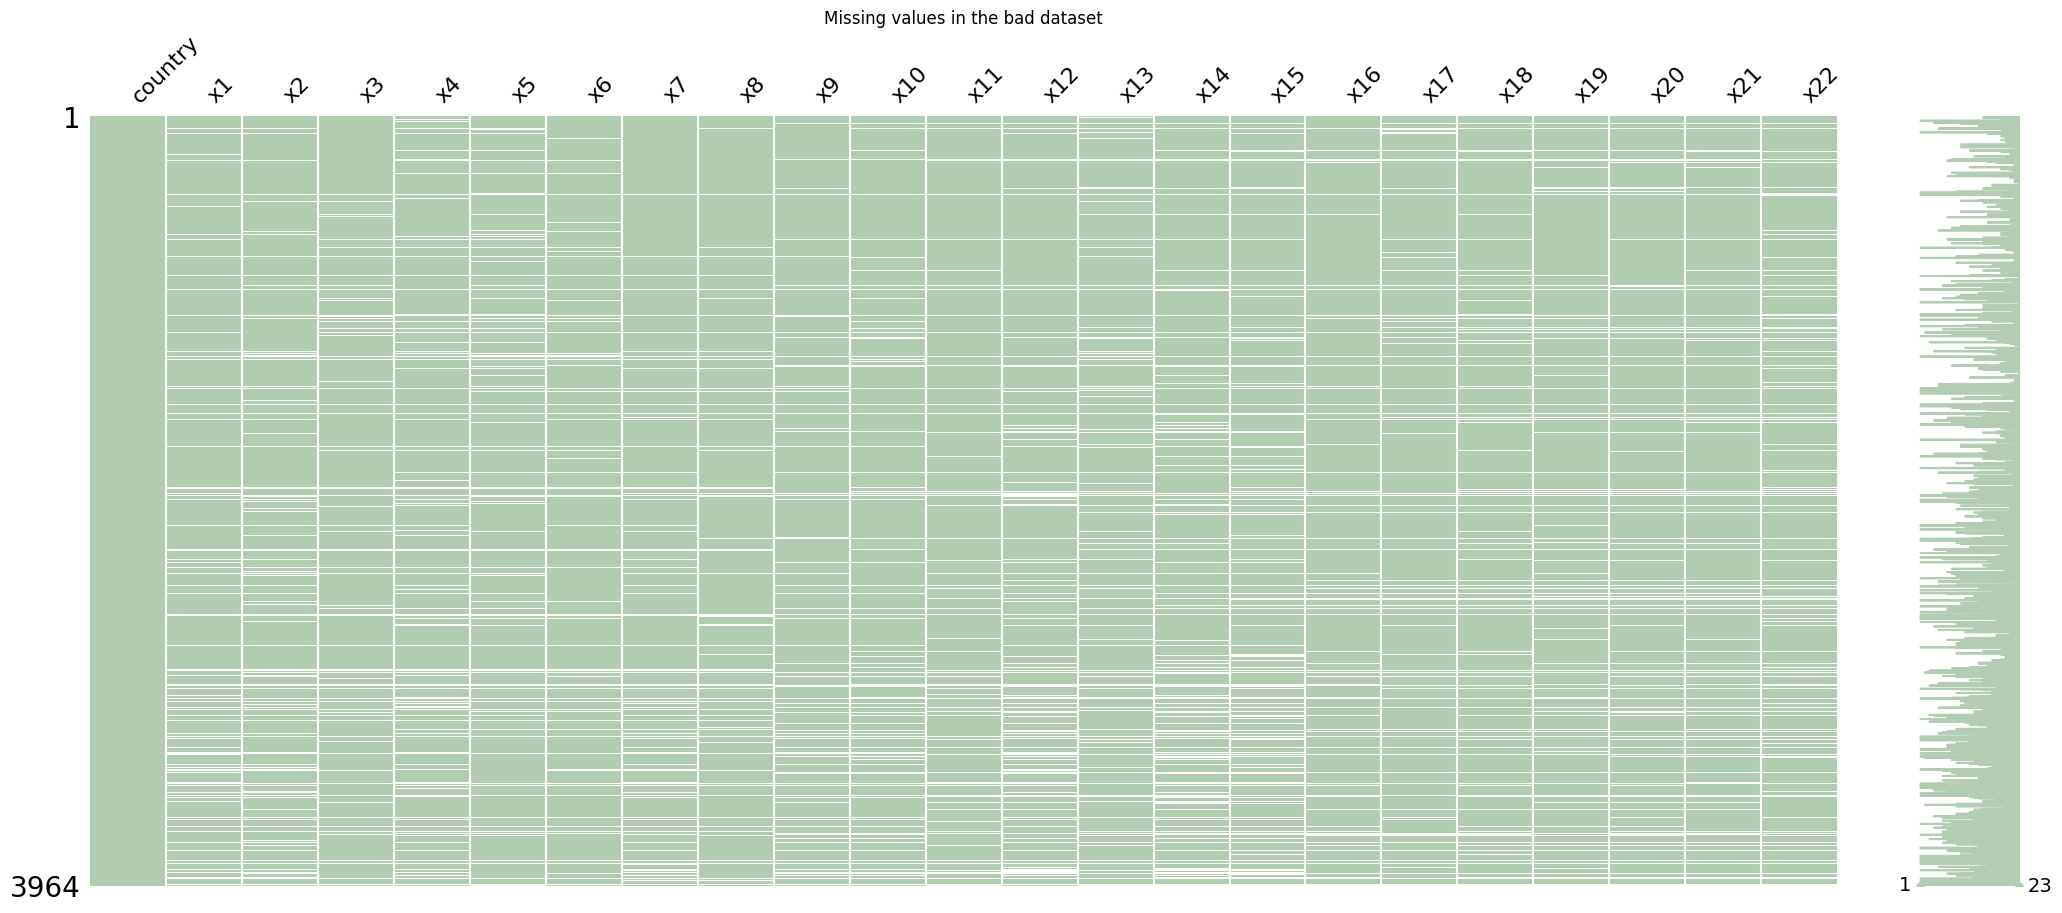

In [18]:
#Visualize missing values for first 23 variables in the bad data
msno.matrix(data_bad.iloc[:,2:25],color = (0.7, 0.8, 0.7))
plt.title("Missing values in the bad dataset")
plt.show()

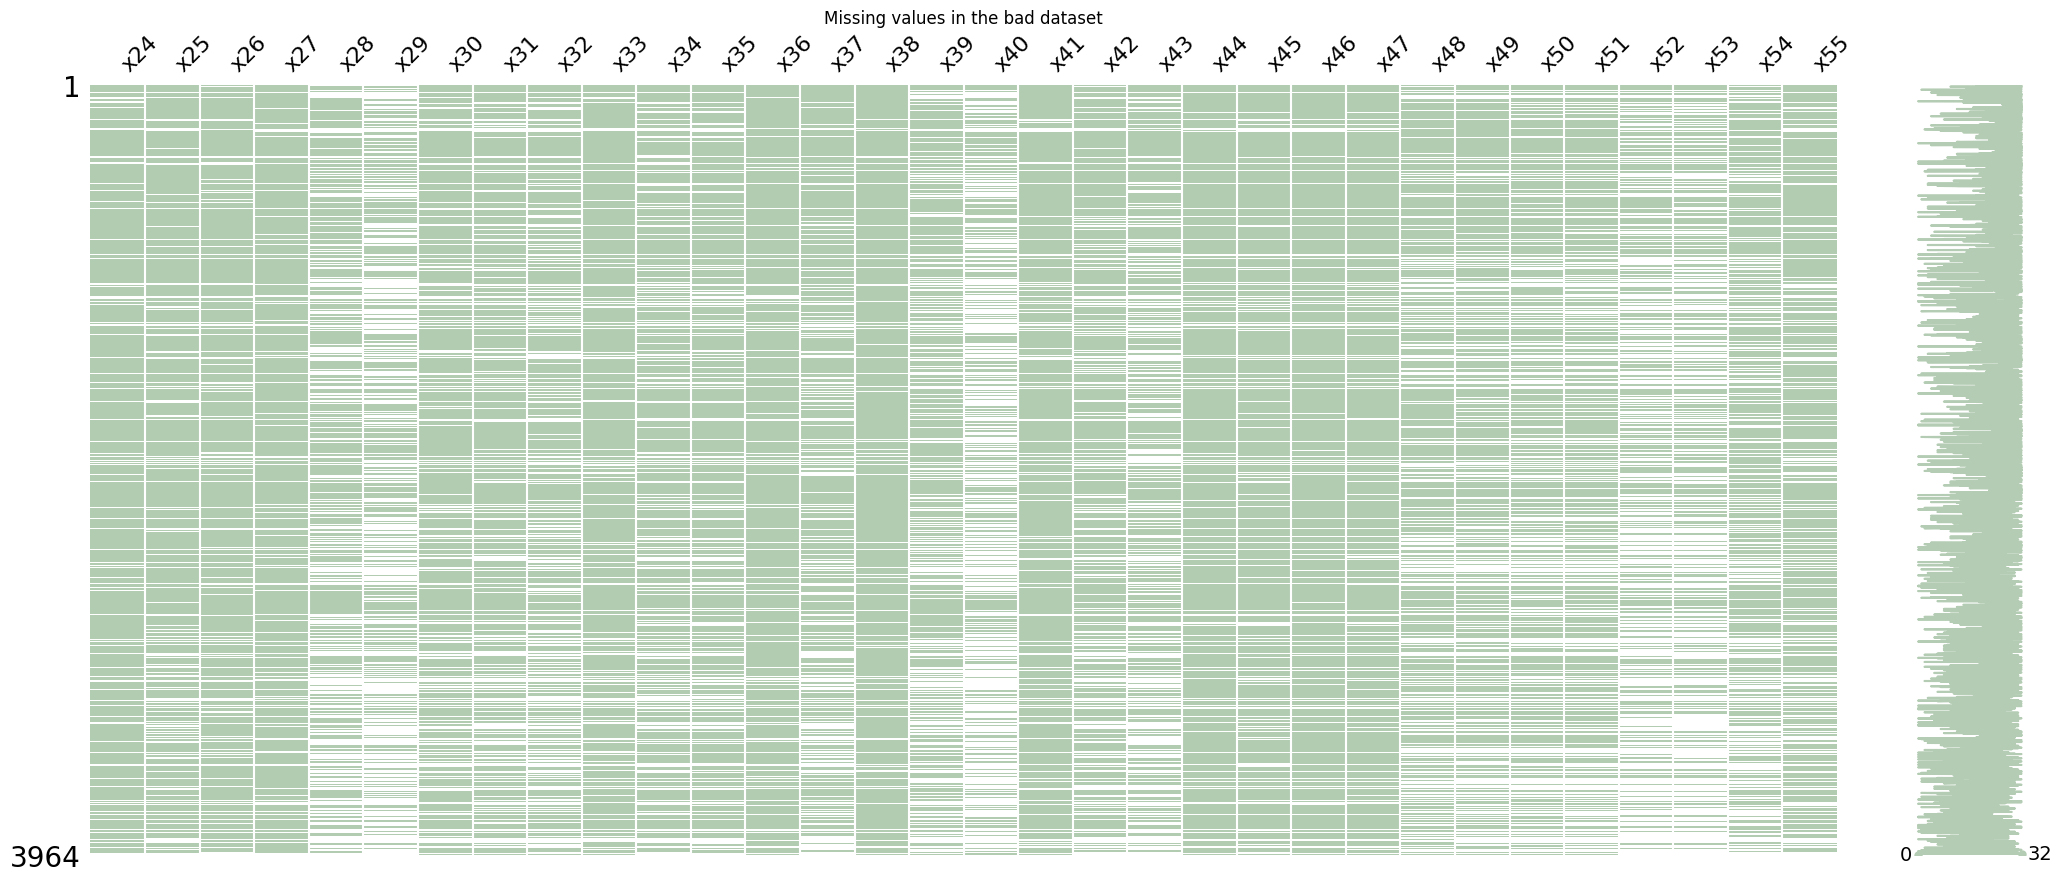

In [19]:
msno.matrix(data_bad.iloc[:,26:],color = (0.7, 0.8, 0.7))
plt.title("Missing values in the bad dataset")
plt.show()

In [20]:
data_bad.isnull().sum().sort_values(ascending = False)[0:4]

x40    2348
x53    2241
x52    2172
x29    2112
dtype: int64

In [21]:
data_bad["n_missing"] = 57 - data_bad.apply(lambda x: x.count(),axis = 1)

In [22]:
data_bad_missing = data_bad.groupby("country").mean().iloc[:,-1:]

#Select countries that are in the top20 regarding missing values
missing_countries = data_bad_missing.sort_values("n_missing", ascending = False).iloc[0:20,0].index
missing_countries

Index(['Maldives', 'Angola', 'Tonga', 'Turks And Caicos Islands', 'Greenland',
       'Comoros', 'American Samoa', 'Mozambique', 'Myanmar', 'Madagascar',
       'Nauru', 'Senegal', 'Guyana', 'Zambia', 'Papua New Guinea', 'Tuvalu',
       'Vatican City', 'Qatar', 'Afghanistan', 'Laos'],
      dtype='object', name='country')

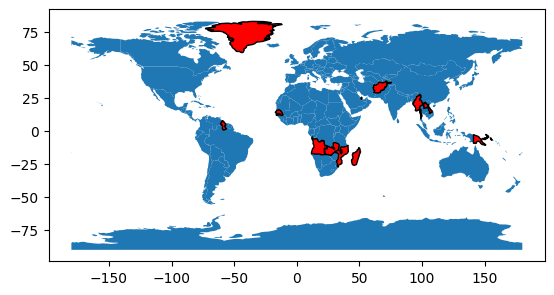

In [23]:
ax = world.plot()
for i in range(len(missing_countries)):
    world[world.name == missing_countries[i]].plot(color='red',ax = ax, edgecolor = "black")
plt.show()

In [24]:
missing_countries.shape

(20,)